<a href="https://colab.research.google.com/github/gunjanak/My_Data_Science_Course/blob/main/Exploratory_data_analysis_and_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from statsmodels.datasets import co2, get_rdataset

In [2]:
closing_price_path = '/content/drive/MyDrive/Colab Notebooks/Pandas/Time_Series_Analysis/Dataset/closing_price.csv'
closing_price = pd.read_csv(closing_price_path,index_col='Date',parse_dates=True)

In [3]:
co2_df = co2.load_pandas().data

In [4]:
co2_df = co2_df.ffill()

In [5]:
air_passengers = get_rdataset("AirPassengers")
airp_df = air_passengers.data


In [6]:
airp_df.head()

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [7]:
airp_df.index = pd.date_range('1949','1961',freq='M')

In [8]:
airp_df.head()

,time,value
1949-01-31,1949.000000,112
1949-02-28,1949.083333,118
1949-03-31,1949.166667,132
1949-04-30,1949.250000,129
1949-05-31,1949.333333,121


In [9]:
airp_df.drop(columns=['time'],inplace=True)

In [10]:
airp_df.head()

,value
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


#Plotting Time series data using pandas

In [11]:
closing_price.tail()

,AAPL,MSFT,IBM
Date,,,
2021-10-26,149.102402,309.543671,119.938713
2021-10-27,148.633087,322.579865,118.089584
2021-10-28,152.347656,323.757690,118.721680
2021-10-29,149.581696,331.014404,118.023544
2021-11-01,148.742920,328.768524,119.136795


<Axes: xlabel='Date'>

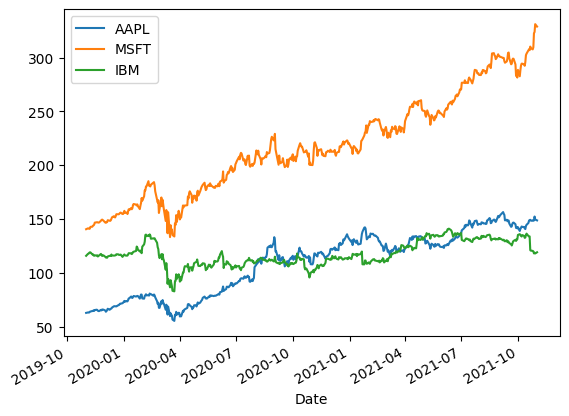

In [12]:
closing_price.plot()

<Axes: xlabel='Date'>

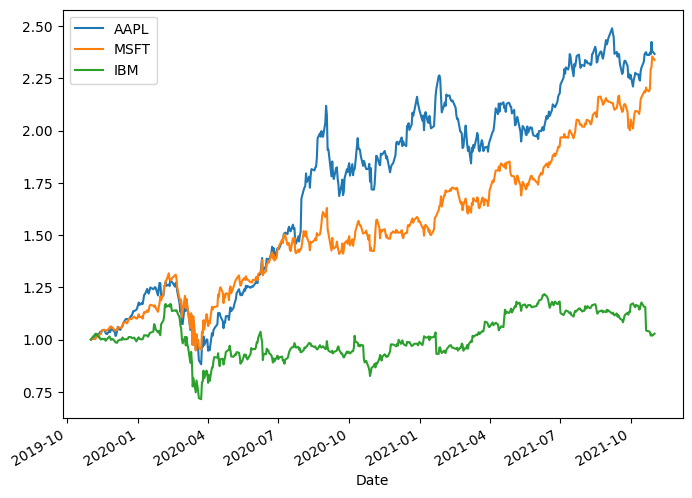

In [13]:
#If you want to see how the prices fluctuate in comparison to each other, 
#one easy approach is to normalize the data
#To accomplish this, just divide the stock prices by the first-day price for each stock
closing_price_n = closing_price.div(closing_price.iloc[0])
closing_price_n.plot(figsize=(8,6))

<Axes: xlabel='Date'>

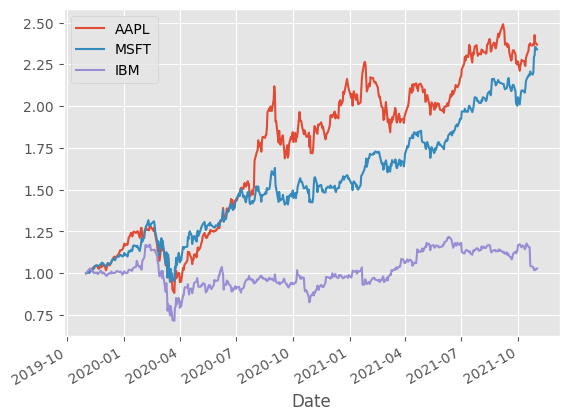

In [14]:
#Additionally, Matplotlib allows us to change the style of the plots.
#todo that, we can change the sytle.use function
plt.style.use('ggplot')
closing_price_n.plot()

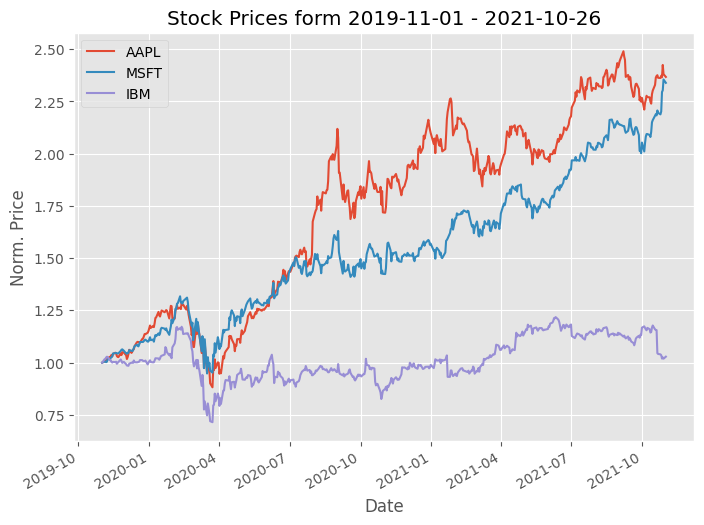

In [15]:
#you can customize the plot further by adding a title,
#updating the axes labels,
#and customizing the x ticks and y ticks
start_date = '2019-11-01'
end_date = '2021-10-26'
plot = closing_price_n.plot(figsize=(8,6),
                            title=f'Stock Prices form {start_date} - {end_date}',
                            ylabel='Norm. Price')

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

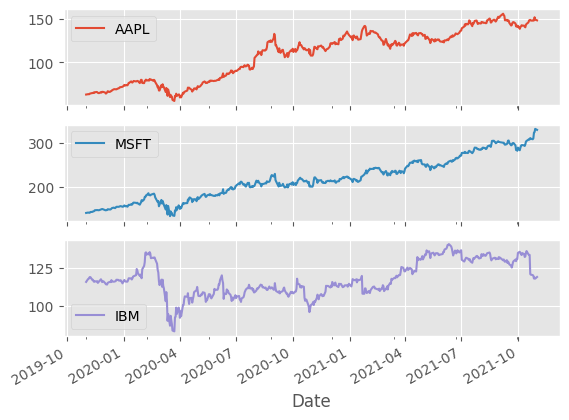

In [16]:
closing_price.plot(subplots=True)

#Decomposing time series data

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose,STL

In [18]:
plt.rcParams["figure.figsize"] = (10,3)

<Axes: >

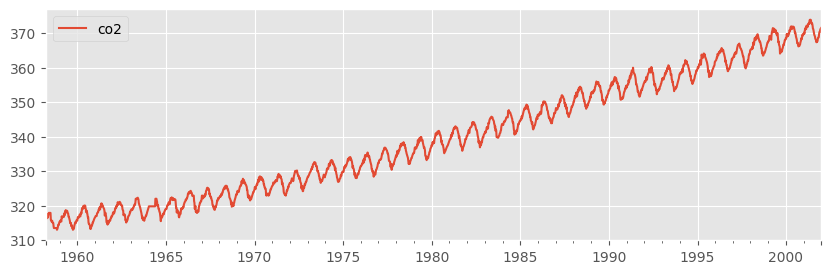

In [19]:
co2_df.plot()

<Axes: >

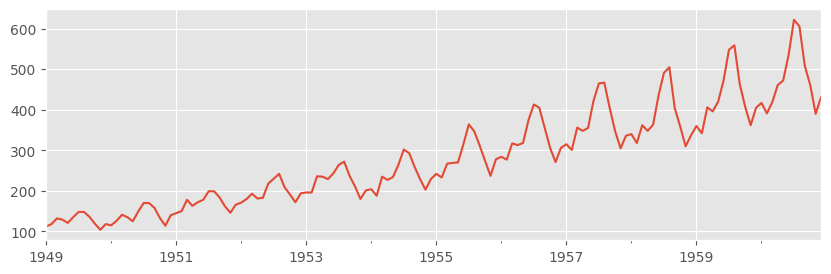

In [20]:
airp_df['value'].plot()

In [21]:
co2_decomposed = seasonal_decompose(co2_df,model='additive')
air_decomposed = seasonal_decompose(airp_df,model='multiplicative')

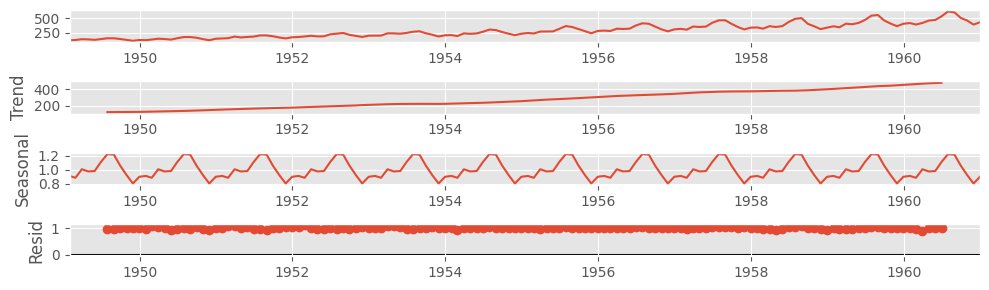

In [22]:
air_decomposed.plot(); plt.show()

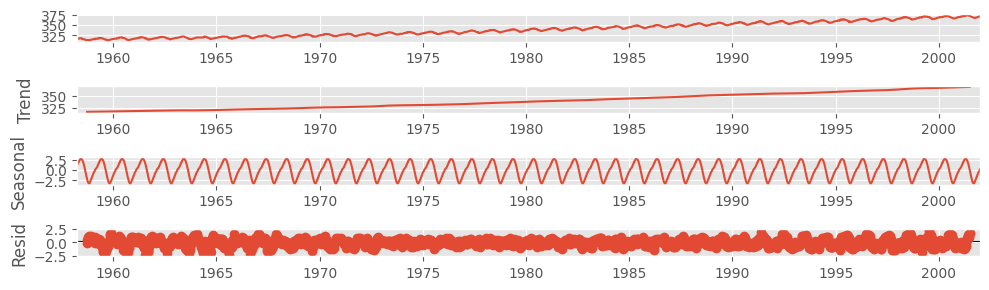

In [23]:
co2_decomposed.plot(); plt.show()

<Axes: >

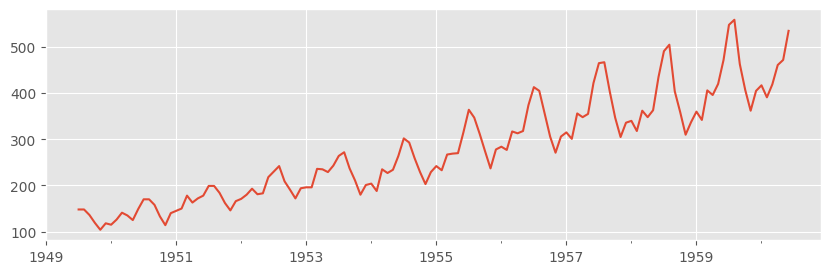

In [26]:
#when reconstructing the time series, for example, in a multiplicative model,
#we will be multiplying the three components.

(air_decomposed.trend * air_decomposed.seasonal* air_decomposed.resid).plot()

In [27]:
#Another decomposition option within statsmodels is STL
#STL class requires additional parameters than the seasonal_decompose function
#The two other parameters are seasonal and roust
co2_stl = STL(co2_df,seasonal=13,robust=True).fit()

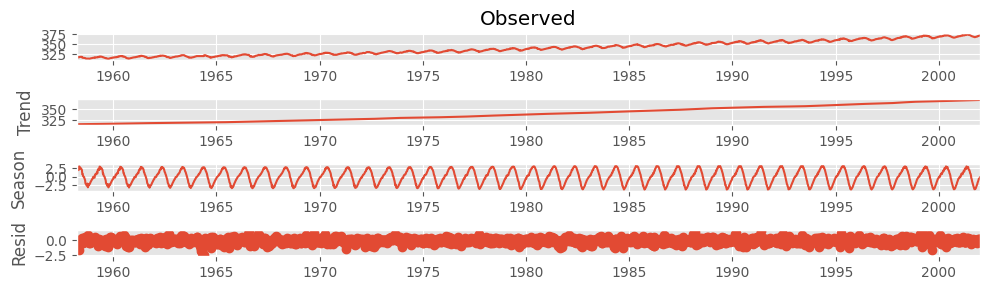

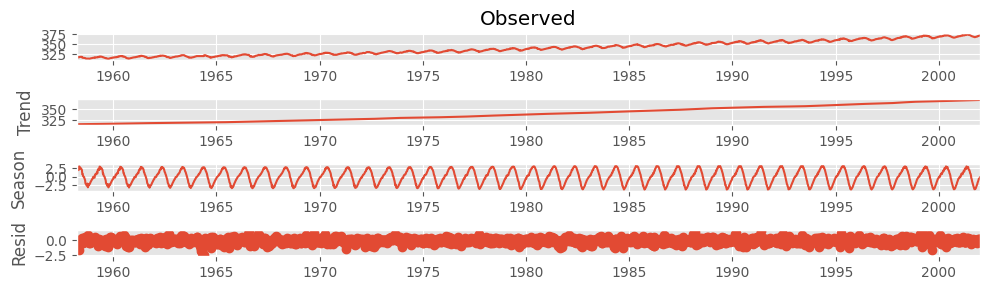

In [28]:
co2_stl.plot()

#Detecting time series stationarity

Several time series forecasting techniques assume stationarity. This makes it essential to understand whether the time seriesyou are working with is stationary or non-stationary.

A stationary time series implies that specific properties do not vary over time and remain steady, making the processes easier to model and predict.

On the other hand, a non-staionary process is more complex to model due to the dynamic nature and variations over time (for example, in the presence of trend or seasonality).

There are different approaches for defining stationarity; some are strict and may not be possible to observe in real-world data, referred to as strong stationarity.

In contrast, other definitions are more modest in their criteria and can be observed in (or transformed into) real-world data, known as weak stationarity.

In this recipe, anf for practial reasons, a stationarity time series is defined as a time series with a constant mean (μ), a constant variance ($σ^2$) and a consistent covaiance between identical distanced periods (lags). Having the mean and variance as constants simplifies modeling since you are not solving for them as fucntions of time.

You will explore two statistical tests, **the Augmented Dickey-Fuller (ADF)** test and the **Kwiatkoski-Phillips-Schmidt-Shin (KPSS)** test, using the *statsmodels *library. Both ADF and KPSS test for unit roots in a univariate time series process. Note that unit roots are just one cause for a time series to be non-stationary, but generally, the presence of unit roots indicates non-stationary.



In [29]:
from statsmodels.tsa.stattools import adfuller, kpss

In [31]:
def print_results(output,test='adf'):
  pval = output[1]
  test_score = output[0]
  lags = output[2]
  decision = 'Non-Stationary'

  if test == 'adf':
    critical = output[4]
    if pval < 0.05:
      decision = 'Stationary'
  elif test == 'kpss':
    critical = output[3]
    if pval >= 0.05:
      decision = 'Stationary'

  output_dict = {
      'Test Statistic':test_score,
      'p-value':pval,
      'Numbers of lags':lags,
      'decision':decision
  }
  for key, value in critical.items():
    output_dict['Critical Value (%s)' % key] = value

  return pd.Series(output_dict,name=test)

In [32]:
adf_output = adfuller(co2_df)
kpss_output = kpss(co2_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [33]:
pd.concat([
    print_results(adf_output,'adf'),
    print_results(kpss_output,'kpss')
],axis=1)

,adf,kpss
Test Statistic,0.046051,7.649196
p-value,0.962179,0.01
Numbers of lags,27,29
decision,Non-Stationary,Non-Stationary
Critical Value (1%),-3.433252,0.739
Critical Value (5%),-2.862822,0.463
Critical Value (10%),-2.567452,0.347
Critical Value (2.5%),NaN,0.574


For ADF, the p-value is at 0.96, which is greater that 0.05, so you cannot reject the null hypothesis, and therefore, the time series in non-stationary.

For KPSS, the p-value is at 0.01, which is less than 0.05, so you reject the null hypothesis, and therefore, the time series is non-stationary.

We will explore six techniques for making the time series stationary.

The techniques covered are first-order differencing, second-order differenceing, subtracting moving average, log transformation, decomposition and Hodrick-Prescott filter.

Essentially, stationary can be achieved by removing trend (detrending) and seasonality effects. For each transformation, we will run the stationarity tests and compare the results between the different techniques.

To simplify the interpretation and comparison, we will create two function:



*   check_stationarity takes a DataFrame, a performs both KPSS and ADF tests, and returns the outcome.


*   plot_comparison takes a list of methods and compare their plots. The function takes plot_type, so we can explore a line chart and a histogram, The function calls the check_stationarity function to capture the results for the subplot titles.



In [34]:
def check_statonarity(df):
  kps = kpss(df)
  adf = adfuller(df)

  kpss_pv, adf_pv = kps[1],adf[1]
  kpssh,adfh = 'Stationary','Non-stationary'

  if adf_pv <0.05:
    #Reject ADF null hypothesis
    adfh = 'Stationary'

  if kpss_pv < 0.05:
    #Reject KPSS Null Hypothesis
    kpssh = 'Non-stationary'

  return (kpssh,adfh) 

In [54]:
def plot_comparison(methods,plot_type='line'):
  n = len(methods)//2
  fig,ax = plt.subplots(n,2,sharex=True,figsize=(20,10))
  for i, method in enumerate(methods):
    method.dropna(inplace=True)

    name = [n for n in globals() if globals() [n] is method]
    v,r = i//2,i%2
    kpss_s,adf_s = check_statonarity(method)

    method.plot(kind=plot_type,ax=ax[v,r],
                legend=False,
                title= f'{name[0]} --> KPSS: {kpss_s},ADF{adf_s}')
    ax[v,r].title.set_size(20)
    method.rolling(52).mean().plot(ax=ax[v,r],legend=False)
    


**First-order differencing** also known as detrending, which is calculated by subtracting on observation at time t from the previous observation at time t-1 ($y_{t} - y_{t-1}$).
In pandas this can be done using the .diff() function, which defaults to period=1. The differenced data will contain one less data point (row) than the original data, hence the use of the .dropna() method.

In [36]:
first_order_diff = co2_df.diff().dropna()

**Second-order differencing** is useful if seasonality exists or if the first-order differencing was insufficient. This is essentiall differencing twice - differencing to remove seasonality followed by differencing to remove trend.

In [39]:
differencing_twice = co2_df.diff(52).diff().dropna()

**Subtracting moving average** (rolling window) from the time series using DataFrame.rolling(window=52).mean() since it is weekly data.

In [40]:
rolling = co2_df.rolling(window=52).mean()
subtract_rolling_mean = co2_df -rolling

**Log transformation** using np.log() is a common technique to stabilize the variance in a time series and sometimes enough to make the time series stationary. 

In [43]:
import numpy as np
log_transform = np.log(co2_df)

Using time series **decomposition** to remove the trend component, such as seasonal_decompose. 

In [45]:
decomp = seasonal_decompose(co2_df)
sd_dtrend = decomp.observed - decomp.trend

**Hodrick-Prescott filter** to remove the trend component

In [47]:
from statsmodels.tsa.filters.hp_filter import hpfilter
cyclic,trend = hpfilter(co2_df)

In [55]:
methods = [first_order_diff,differencing_twice,subtract_rolling_mean,
           log_transform, sd_dtrend,cyclic]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the 

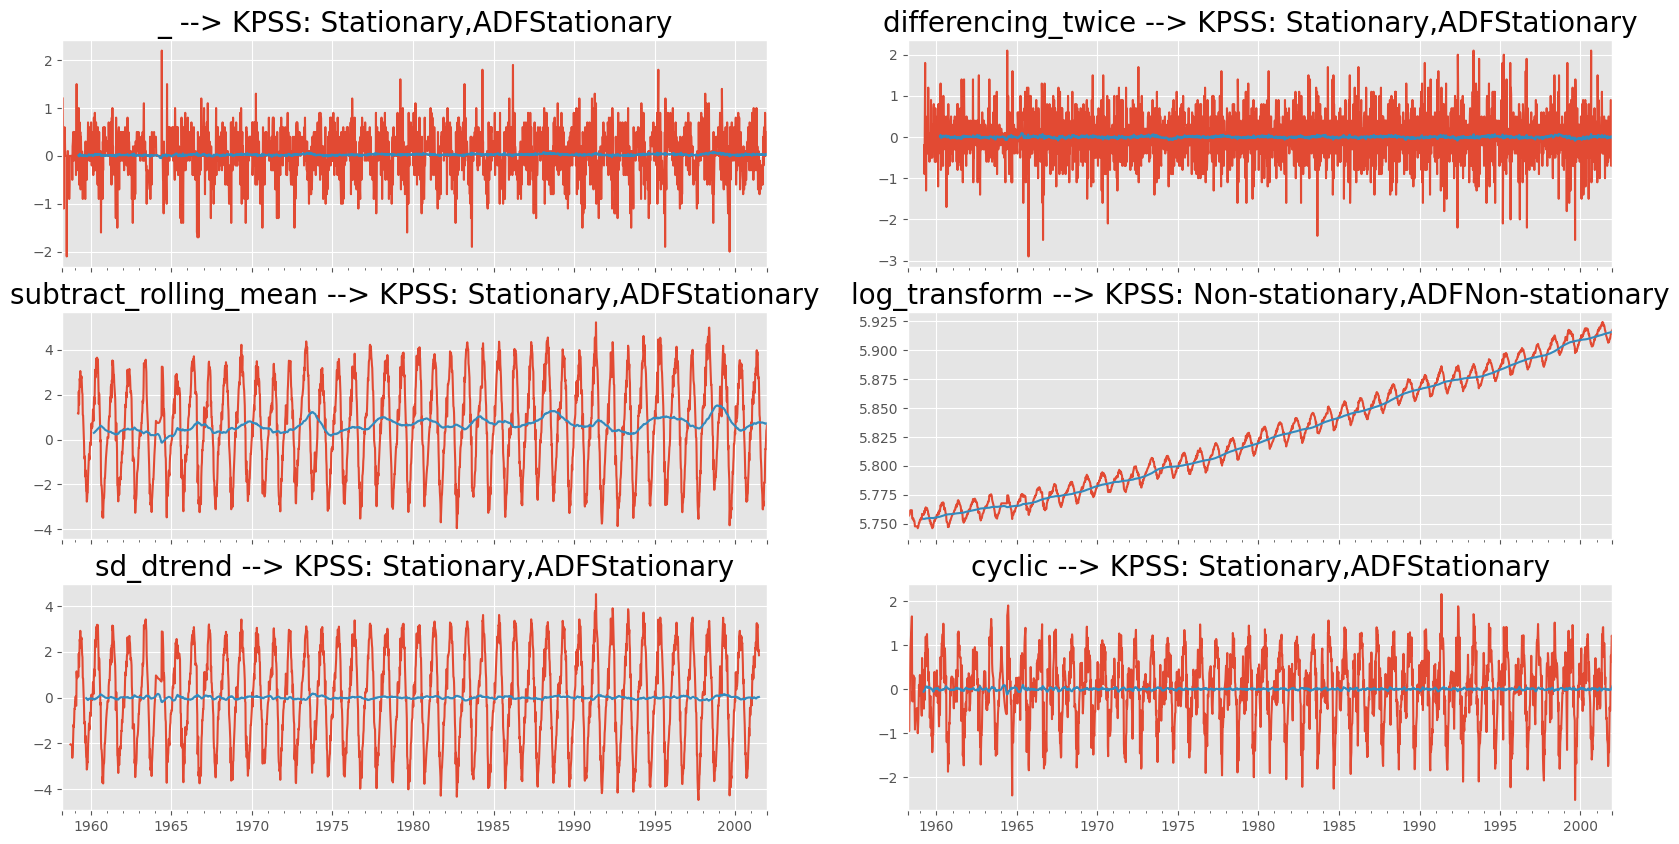

In [56]:
plot_comparison(methods)

Generally we do not want to over-difference our time series as over-differenced data are less accurate.

For example, first_order_difference already made the time series stationary and thus there was no need to difference it any further.

In [57]:
#Both ADF and KPSS use Ordianry Least Squares (OLS) regression.
#OLS regression is used to compute the model's coefficients
#To view the OLS results for ADF, we use the store parameter and set it to True
adf_result = adfuller(first_order_diff,store=True)

In [ ]:
adf_result[-1].resols.summary()

#Applying power transformations

##Testing normality

In [64]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

In [65]:
from scipy.stats import shapiro,kstest, normaltest
from statsmodels.stats.diagnostic import kstest_normal,normal_ad

In [60]:
def is_normal(test,p_level=0.5):
  stat,pval = test
  return 'Normal' if pval > 0.05 else 'Not Normal'

In [72]:
normal_args = (np.mean(co2_df),np.std(co2_df))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [73]:
print(is_normal(shapiro(co2_df)))

Not Normal


In [74]:
print(is_normal(normaltest(co2_df)))

Not Normal


In [75]:
print(is_normal(normal_ad(co2_df)))

Not Normal


In [80]:
print(is_normal(kstest_normal(co2_df)))

Not Normal


##Testing homoskedactistity

In [81]:
from statsmodels.stats.api import (het_breuschpagan,het_goldfeldquandt)

In [82]:
def het_test(model,test=het_breuschpagan):
  lm,lm_pvalue,fvalue, f_pvalue = (het_breuschpagan(model.resid,sm.add_constant(model.fittedvalues)))
  return "Heteroskedastic" if f_pvalue < 0.05 else "Homoskedastic"

In [83]:
from statsmodels.tsa.api import AutoReg
model = AutoReg(co2_df.dropna(),lags=1).fit()

In [84]:
het_test(model,test=het_breuschpagan)

'Homoskedastic'

## Applying Box-Cox transform

 Box-Cox trasforms a non-normally distributed dataset into a normally distributed one. At the same time, it stabilizes the variance, making the data homoskedastic.
 

In [85]:
from scipy.stats import boxcox


In [89]:
airp_path= '/content/drive/MyDrive/Colab Notebooks/Pandas/Time_Series_Analysis/Dataset/air_passenger.csv'
airp = pd.read_csv(closing_price_path,index_col='date',parse_dates=True)

In [90]:
xt,lmbda = boxcox(airp['passengers'])
xts = pd.Series(xt,index=airp.index)

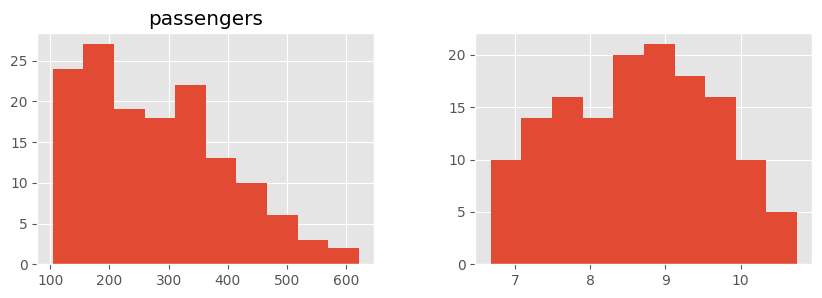

In [91]:
fig,ax = plt.subplots(1,2)
airp.hist(ax=ax[0])
xts.hist(ax=ax[1])
plt.show()

The second histogram shows that the data was transformed and the overall distribution changed.

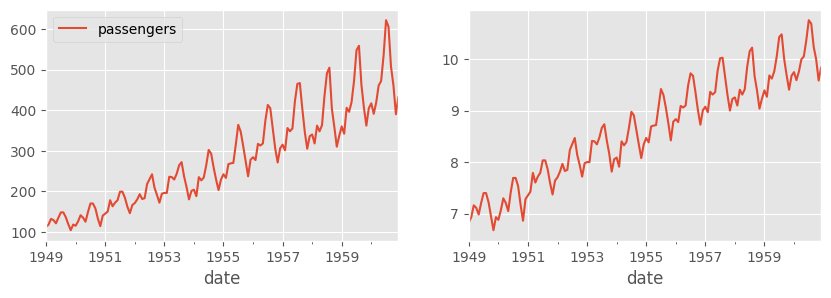

In [92]:
fig,ax = plt.subplots(1,2)
airp.plot(ax=ax[0])
xts.plot(ax=ax[1])
plt.show()

Notice how the seasonal effect on the transformed dataset looks more stable than before.

Finally, build two simple autoregressive models to compare the effect on the residuals before and after transformations

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='date'>

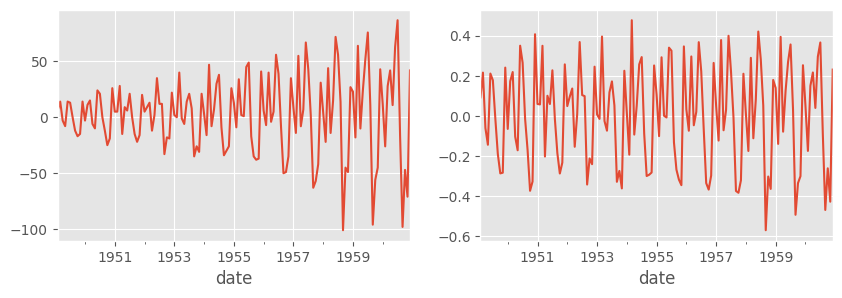

In [94]:
model_airp = AutoReg(airp,lags=1,trend='n').fit()
model_bx = AutoReg(xts,lags=1,trend='n').fit()
fig,ax = plt.subplots(1,2)
model_airp.resid.plot(ax=ax[0])
model_bx.resid.plot(ax=ax[1])

Box-Cox allows us to make the data both normal and homoskedastic and is part of a family of power transforms that includes log transform and square root transform. Box-Cox is a powerful transform because it supports both root and log transforms, and others are made possible by changing the lambda values.
Box-Cox requires the date to be positive.

..........................
AutoReg model comes with two useful methods: diagnostic_summary() and plot_diagnostics().



In [95]:
print(model_bx.diagnostic_summary())

       Test of No Serial Correlation       
       Lag  Ljung-Box LB P-value         DF
-------------------------------------------
         1      8.800      0.003          1
         2     12.729      0.002          2
         3     28.040      0.000          3
         4     29.202      0.000          4
         5     29.205      0.000          5
         6     31.021      0.000          6
         7     47.992      0.000          7
         8     50.468      0.000          8
         9     52.247      0.000          9


             Test of Normality              
Jarque-Bera    P-value   Skewness   Kurtosis
--------------------------------------------
      5.987      0.050     -0.128      2.031


    Test of Conditional Homoskedasticity   
       Lag    ARCH-LM    P-value         DF
-------------------------------------------
         1      0.116      0.733          1
         2      1.243      0.537          2
         3      4.112      0.250          3
         4      4.058   

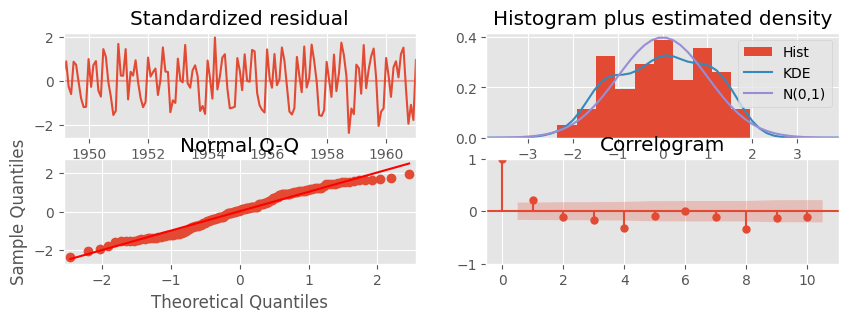

In [96]:
model_bx.plot_diagnostics();
plt.show()

#Testing for autocorrelation in time series data

**Autocorrelation** compares a variable with its lagged version of itself.



We will perform a **Ljung-Box test ** to check for autocorrelations up to a specified lag and whether they are signigicantly far off from 0.


The null hypothesis for the Ljung-Box test states that the previous lags are not correlated with the current period. In other words, we are testing for absence of autocorrelation.

When running the test using acorr_ljungbox from statsmodels, we need to provide a lag value. 
The test will run for all lags up to the specified lag.

When testing for autocorrelation on the residuals, the expectaion is that there should be no autocorrrelation between the residuals. 

This ensures that the model has captured all the necessary information. 

The presence of autocorrelation in the residuals can indicate that the model missed an opportunity to capture critical information and will need to be evaluated.

In [97]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [98]:
co2_diff =np.log(co2_df).diff().dropna()

In [100]:
acorr_ljungbox(co2_df,lags=10,return_df=True)

,lb_stat,lb_pvalue
1,2279.710040,0.0
2,4553.038468,0.0
3,6819.419295,0.0
4,9077.759313,0.0
5,11327.197165,0.0
6,13566.975329,0.0
7,15796.707355,0.0
8,18016.068399,0.0
9,20224.780497,0.0
10,22422.650954,0.0


This shows that the test statistic for all lags up to 10 are significant (p-value <0.05), so we can reject the null hypothesis. Rejecting the null hypothesis means we reject the claim that there is no autocorrelation.